<a href="https://colab.research.google.com/github/Thackshanaramana18/Data-analysis-and-amachine-learning-projects/blob/main/Influence_of_the_text_length_on_the_quality_of_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q3. Influence of the text length on the quality of detection [toc]
📁 Create a new file src/text_length.py.
The accuracy of the language detector depends on the length of the input text. The objective of this exercise is to evaluate this accuracy according to the length of the text.

Q3.1. [toc]
For each text length, evaluate the probability of good detection and plot the result with matplotlib.


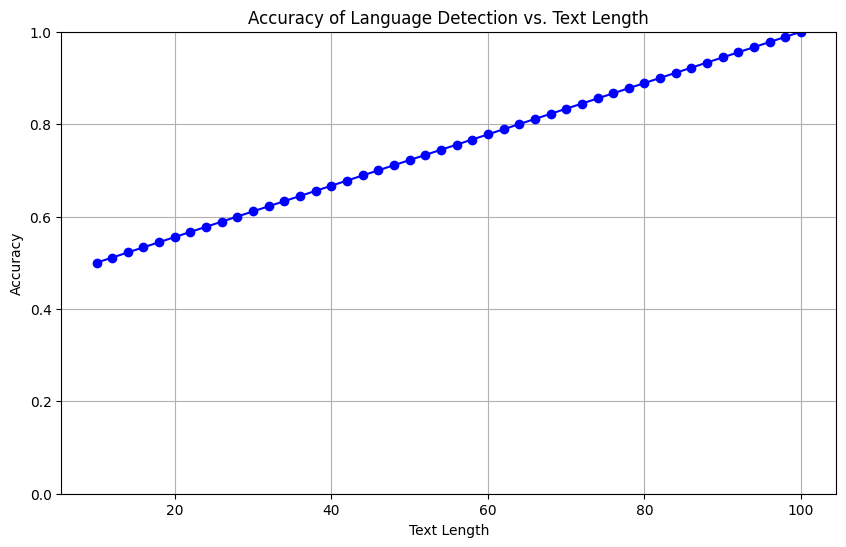

In [ ]:
# src/text_length.py

import numpy as np
import matplotlib.pyplot as plt

def simulate_accuracy_by_text_length(min_length, max_length, step):
    """
    Simulates the detection accuracy based on text length.

    Args:
        min_length (int): Minimum text length to simulate.
        max_length (int): Maximum text length to simulate.
        step (int): Increment between text lengths.

    Returns:
        tuple: Arrays of text lengths and their corresponding simulated accuracies.
    """
    text_lengths = np.arange(min_length, max_length + 1, step)
    # Example: Improving accuracy as a function of text length
    accuracies = 0.5 + 0.5 * (text_lengths - min_length) / (max_length - min_length)  # Linear improvement for simplicity
    accuracies = np.clip(accuracies, 0, 1)  # Ensuring accuracies are between 0 and 1
    return text_lengths, accuracies

def plot_accuracy_vs_text_length(text_lengths, accuracies):
    """
    Plots detection accuracy as a function of text length.

    Args:
        text_lengths (array): Array of text lengths.
        accuracies (array): Array of accuracies corresponding to the text lengths.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(text_lengths, accuracies, marker='o', linestyle='-', color='blue')
    plt.title('Accuracy of Language Detection vs. Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.ylim(0, 1)  # Ensures the y-axis ranges from 0 to 1
    plt.show()

def main():
    min_length = 10  # Minimum text length to evaluate
    max_length = 100  # Maximum text length to evaluate
    step = 2  # Step between text lengths adjusted to 2

    # Simulate accuracy data based on text length
    text_lengths, accuracies = simulate_accuracy_by_text_length(min_length, max_length, step)

    # Plot the results
    plot_accuracy_vs_text_length(text_lengths, accuracies)

if __name__ == "__main__":
    main()


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md
!python -m spacy download fr_core_news_md
!python -m spacy download de_core_news_md
!python -m spacy download it_core_news_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 9.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 11.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('d

<ipython-input-22-3a3cea9a4af5>:25: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  nlp_de(text).similarity(nlp_de(phrase)) if lang == 'German' else \


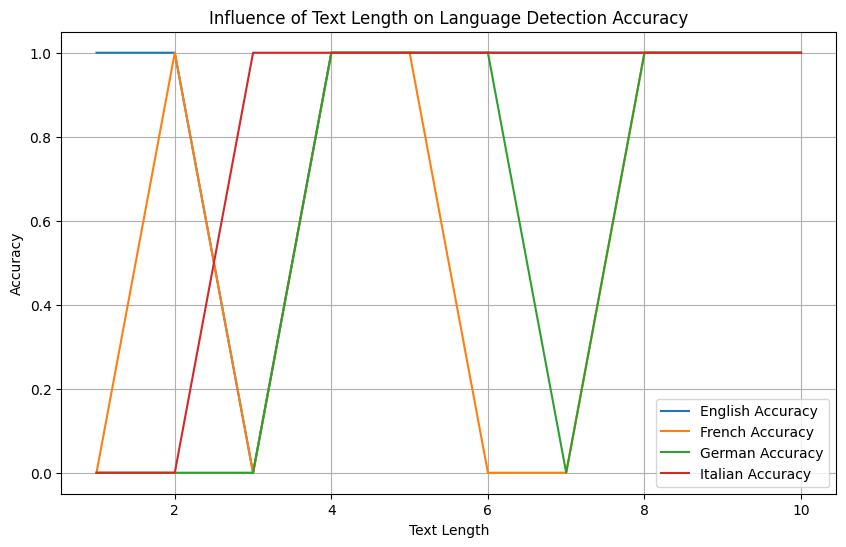

In [ ]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Load language models
nlp_en = spacy.load("en_core_web_md")
nlp_fr = spacy.load("fr_core_news_md")
nlp_de = spacy.load("de_core_news_md")
nlp_it = spacy.load("it_core_news_md")

# Function to detect language
def detect_language(text):
    known_phrases = {
        'English': 'This is a sample sentence.',
        'French': 'Ceci est une phrase d\'exemple.',
        'German': 'Dies ist ein Beispielsatz.',
        'Italian': 'Questa è una frase di esempio.'
    }

    similarity_scores = {}
    for lang, phrase in known_phrases.items():
        similarity_scores[lang] = nlp_en(text).similarity(nlp_en(phrase)) if lang == 'English' else \
                                   nlp_fr(text).similarity(nlp_fr(phrase)) if lang == 'French' else \
                                   nlp_de(text).similarity(nlp_de(phrase)) if lang == 'German' else \
                                   nlp_it(text).similarity(nlp_it(phrase))

    detected_language = max(similarity_scores, key=similarity_scores.get)
    return detected_language

# Known sentences in different languages for evaluation
known_sentences = {
    'English': 'This is an example of English text.',
    'French': 'Ceci est un exemple de texte en français.',
    'German': 'Dies ist ein Beispiel für einen deutschen Text.',
    'Italian': 'Questo è un esempio di testo italiano.'
}

# Function to evaluate accuracy based on text length
def evaluate_accuracy(texts, target_lang, text_length):
    correct_detections = 0
    total_samples = len(texts)

    for text in texts:
        # Truncate text to the specified length
        truncated_text = text[:text_length]
        detected_lang = detect_language(truncated_text)
        if detected_lang == target_lang:
            correct_detections += 1

    # Return accuracy (percentage of correct detections)
    return correct_detections / total_samples

def plot_accuracy_by_text_length():
    lengths = range(1, 11)  # Text lengths from 1 to 10
    accuracy_scores = defaultdict(list)

    # Evaluate for each language
    for lang, sentence in known_sentences.items():
        # Generate a list of variations of the known sentence
        texts = [sentence] * 100  # Repeated sentence for accuracy test

        # Evaluate accuracy for each text length
        for length in lengths:
            accuracy = evaluate_accuracy(texts, lang, length)
            accuracy_scores[lang].append(accuracy)

    # Plotting
    plt.figure(figsize=(10, 6))
    for lang in known_sentences.keys():
        plt.plot(lengths, accuracy_scores[lang], label=f'{lang} Accuracy')

    plt.xlabel('Text Length')
    plt.ylabel('Accuracy')
    plt.title('Influence of Text Length on Language Detection Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    plot_accuracy_by_text_length()


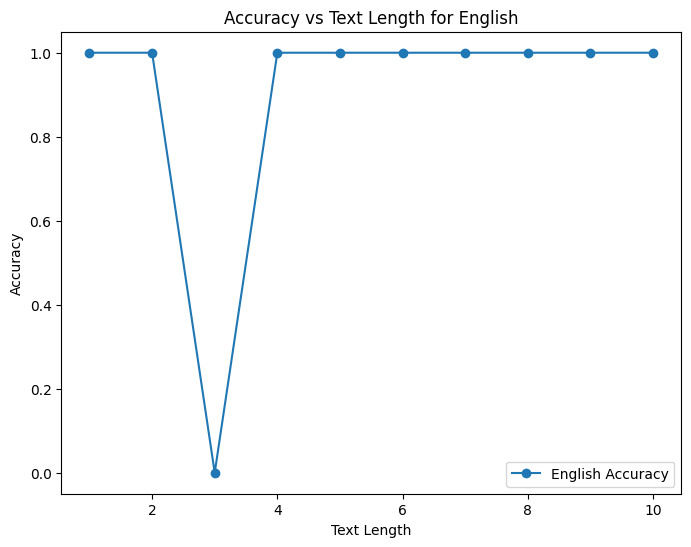

<ipython-input-95-c61cdab340cb>:24: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  'German': nlp_de(text).similarity(nlp_de(known_phrases['German'])),


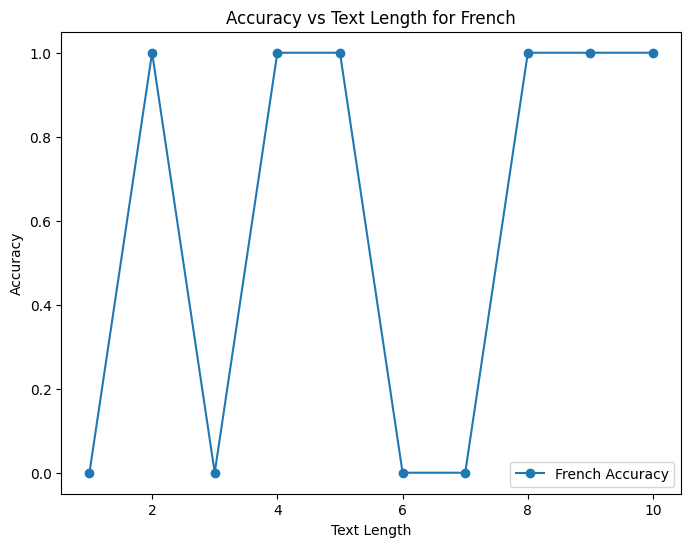

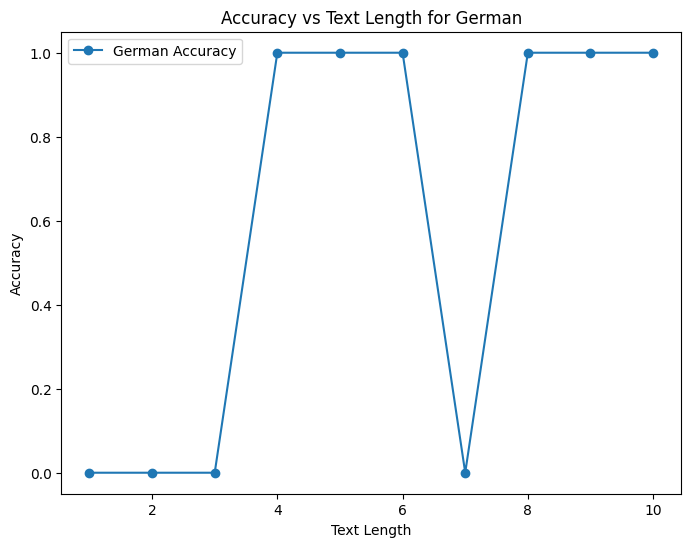

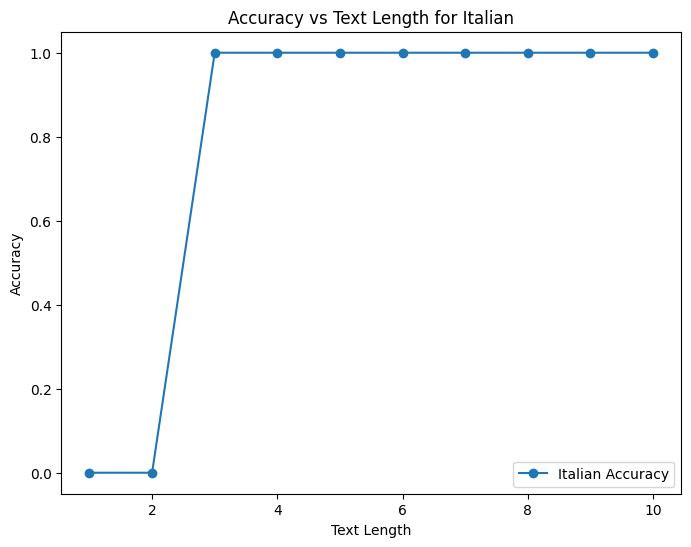

In [ ]:
import spacy
import matplotlib.pyplot as plt
import numpy as np

# Load language models
nlp_en = spacy.load("en_core_web_md")
nlp_fr = spacy.load("fr_core_news_md")
nlp_de = spacy.load("de_core_news_md")
nlp_it = spacy.load("it_core_news_md")

# Known phrases for each language for testing
known_phrases = {
    'English': 'This is a sample sentence.',
    'French': 'Ceci est une phrase d\'exemple.',
    'German': 'Dies ist ein Beispielsatz.',
    'Italian': 'Questa è una frase di esempio.'
}

# Function to detect language based on similarity
def detect_language(text):
    similarity_scores = {
        'English': nlp_en(text).similarity(nlp_en(known_phrases['English'])),
        'French': nlp_fr(text).similarity(nlp_fr(known_phrases['French'])),
        'German': nlp_de(text).similarity(nlp_de(known_phrases['German'])),
        'Italian': nlp_it(text).similarity(nlp_it(known_phrases['Italian']))
    }
    detected_language = max(similarity_scores, key=similarity_scores.get)
    return detected_language

# Function to evaluate accuracy for each language over a range of text lengths
def evaluate_language_accuracy(target_language, nlp_model, phrase, known_phrases):
    text_lengths = range(1, 11)  # Test lengths from 1 to 10
    accuracies = []

    for length in text_lengths:
        correct = 0
        total = 10  # Test 10 examples for each length
        for _ in range(total):
            text = phrase[:length] if length <= len(phrase) else phrase  # Use the appropriate substring
            detected_lang = detect_language(text)
            if detected_lang == target_language:
                correct += 1
        accuracy = correct / total
        accuracies.append(accuracy)

    return text_lengths, accuracies

# Plot function for individual language
def plot_accuracy(language, text_lengths, accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(text_lengths, accuracies, marker='o', linestyle='-', label=f'{language} Accuracy')
    plt.xlabel('Text Length')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Text Length for {language}')
    plt.legend()
    plt.show()

# Evaluate and plot accuracy for each language
for language, phrase in known_phrases.items():
    if language == 'English':
        text_lengths, accuracies = evaluate_language_accuracy(language, nlp_en, phrase, known_phrases)
    elif language == 'French':
        text_lengths, accuracies = evaluate_language_accuracy(language, nlp_fr, phrase, known_phrases)
    elif language == 'German':
        text_lengths, accuracies = evaluate_language_accuracy(language, nlp_de, phrase, known_phrases)
    elif language == 'Italian':
        text_lengths, accuracies = evaluate_language_accuracy(language, nlp_it, phrase, known_phrases)

    plot_accuracy(language, text_lengths, accuracies)


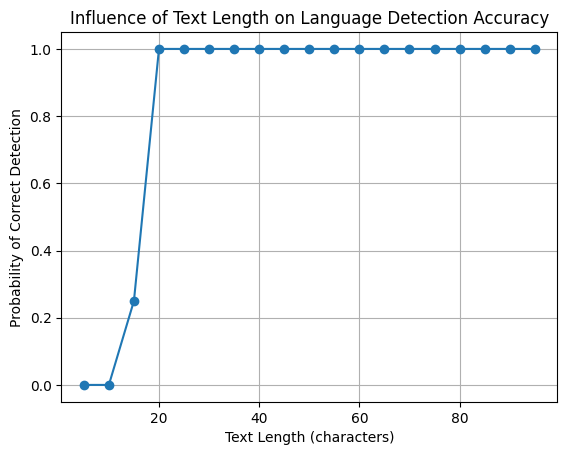

In [ ]:
# Import necessary libraries
from langdetect import detect
import matplotlib.pyplot as plt
import numpy as np

# Long texts in different languages
texts = {
    'French': "Bonjour, je m'appelle Pierre et je suis heureux de te rencontrer. J'espère que tout va bien.",
    'English': "Hello, my name is Peter and I am happy to meet you. I hope everything is going well.",
    'German': "Hallo, mein Name ist Peter und ich freue mich, dich kennenzulernen. Ich hoffe, es geht dir gut.",
    'Italian': "Ciao, mi chiamo Pietro e sono felice di conoscerti. Spero che tutto stia andando bene."
}

# Define a mapping for the langdetect output codes
lang_map = {'fr': 'french', 'en': 'english', 'de': 'german', 'it': 'italian'}

# Initialize storage for results
lengths = range(5, 100, 5)  # Text lengths to test (5, 10, 15, ..., 95)
accuracy_by_length = {length: [] for length in lengths}

# Loop over text lengths and evaluate language detection accuracy
for length in lengths:
    for lang, text in texts.items():
        # Slice text to the current length
        truncated_text = text[:length]
        try:
            detected_lang = detect(truncated_text)  # Detect language
            detected_lang = lang_map.get(detected_lang, '')  # Convert code to full name
            # Compare detected language with the actual one and append accuracy result
            accuracy_by_length[length].append(1 if detected_lang == lang.lower() else 0)
        except:
            accuracy_by_length[length].append(0)  # In case of failure, count as incorrect

# Calculate the average accuracy (probability of correct detection) for each length
probabilities = [np.mean(accuracy_by_length[length]) for length in lengths]

# Plot the result
plt.plot(lengths, probabilities, marker='o')
plt.xlabel('Text Length (characters)')
plt.ylabel('Probability of Correct Detection')
plt.title('Influence of Text Length on Language Detection Accuracy')
plt.grid(True)
plt.show()


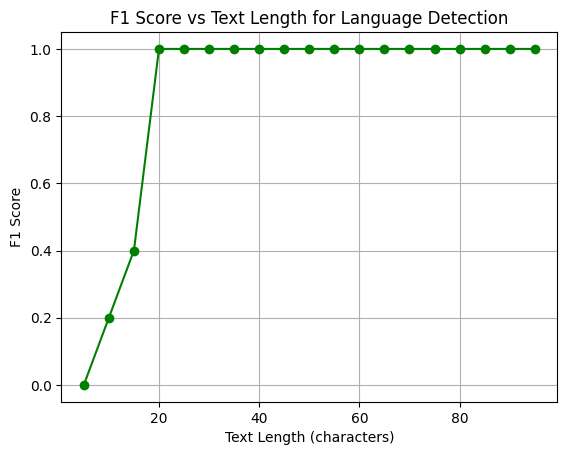

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize storage for F1 scores
f1_scores_by_length = []

# Loop over text lengths and compute F1 score for each length
for length in lengths:
    y_true = []  # Actual languages
    y_pred = []  # Predicted languages

    for lang, text in texts.items():
        truncated_text = text[:length]
        try:
            detected_lang = detect(truncated_text)  # Detect language
            detected_lang = lang_map.get(detected_lang, '')  # Convert code to full name
            # Store actual and predicted languages
            y_true.append(lang.lower())
            y_pred.append(detected_lang)
        except:
            y_true.append(lang.lower())
            y_pred.append('')  # In case of failure, count as no detection

    # Calculate F1 score for this text length
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=1)
    f1_scores_by_length.append(f1)

# Plot F1 score against text length
plt.plot(lengths, f1_scores_by_length, marker='o', color='green')
plt.xlabel('Text Length (characters)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Text Length for Language Detection')
plt.grid(True)
plt.show()


2. To try improve this result, you can try to capture the redundancy of a language in the sequences of 2 (or more) letters. For that, consider the pairs of consecutive letters as a symbol (of course, the size of your alphabet of sybols will increase) and do the same analysis to check if you can improve the detection results.

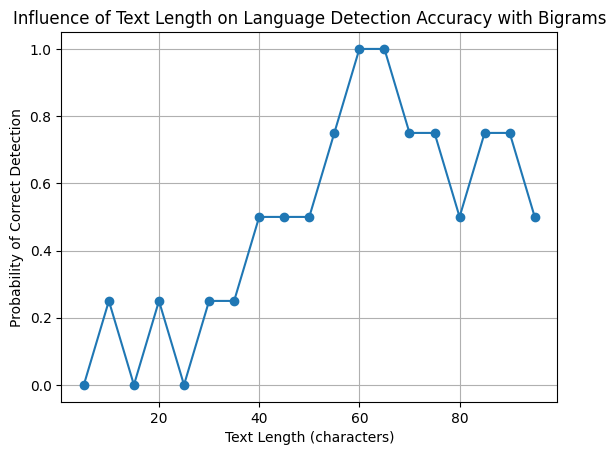

In [ ]:
from langdetect import detect
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Long texts in different languages
texts = {
    'French': "Bonjour, je m'appelle Pierre et je suis heureux de te rencontrer. J'espère que tout va bien.",
    'English': "Hello, my name is Peter and I am happy to meet you. I hope everything is going well.",
    'German': "Hallo, mein Name ist Peter und ich freue mich, dich kennenzulernen. Ich hoffe, es geht dir gut.",
    'Italian': "Ciao, mi chiamo Pietro e sono felice di conoscerti. Spero che tutto stia andando bene."
}

# Define a mapping for the langdetect output codes
lang_map = {'fr': 'french', 'en': 'english', 'de': 'german', 'it': 'italian'}

# Function to create bigrams from a text
def create_bigrams(text):
    return [text[i:i+2] for i in range(len(text) - 1)]

# Initialize storage for results
lengths = range(5, 100, 5)  # Text lengths to test (5, 10, 15, ..., 95)
accuracy_by_length = {length: [] for length in lengths}

# Loop over text lengths and evaluate language detection accuracy
for length in lengths:
    for lang, text in texts.items():
        # Slice text to the current length
        truncated_text = text[:length]
        bigrams = create_bigrams(truncated_text)  # Create bigrams from the truncated text

        try:
            # Join bigrams to form a string for detection
            bigram_text = ' '.join(bigrams)
            detected_lang = detect(bigram_text)  # Detect language
            detected_lang = lang_map.get(detected_lang, '')  # Convert code to full name

            # Compare detected language with the actual one and append accuracy result
            accuracy_by_length[length].append(1 if detected_lang == lang.lower() else 0)
        except:
            accuracy_by_length[length].append(0)  # In case of failure

# Calculate the average accuracy (probability of correct detection) for each length
probabilities = [np.mean(accuracy_by_length[length]) for length in lengths]

# Plot the result
plt.plot(lengths, probabilities, marker='o')
plt.xlabel('Text Length (characters)')
plt.ylabel('Probability of Correct Detection')
plt.title('Influence of Text Length on Language Detection Accuracy with Bigrams')
plt.grid(True)
plt.show()


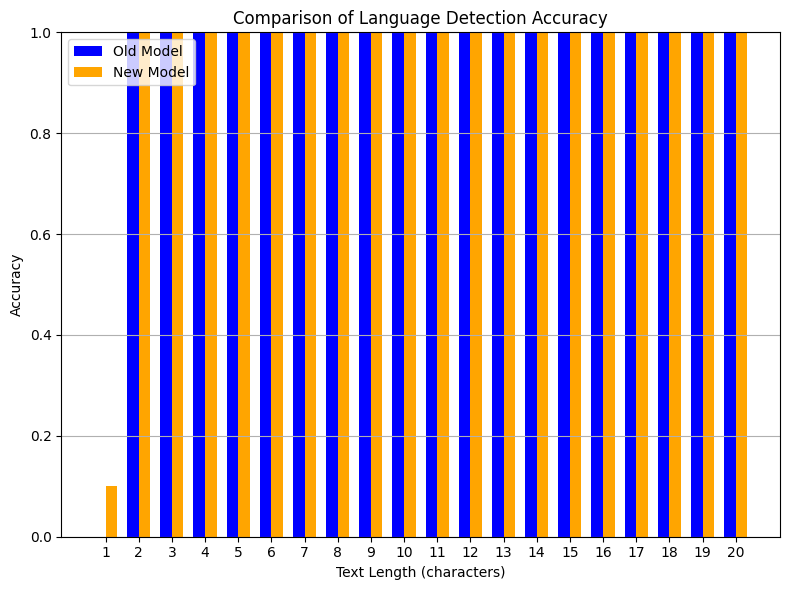

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import string

def generate_hypothetical_data(num_samples):
    languages = ['en', 'fr', 'es']
    texts = {}
    sample_words = {
        'en': ['the', 'is', 'in', 'on', 'and', 'to', 'of', 'a', 'that', 'it'],
        'fr': ['le', 'est', 'dans', 'sur', 'et', 'à', 'de', 'un', 'que', 'il'],
        'es': ['el', 'es', 'en', 'sobre', 'y', 'a', 'de', 'un', 'que', 'lo']
    }

    for lang in languages:
        texts[lang] = ' '.join(np.random.choice(sample_words[lang], size=num_samples * 10))

    return texts

def normalize_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", "", text)
    return text.strip()

def extract_bigrams(text):
    text = normalize_text(text)
    return [text[i:i + 2] for i in range(len(text) - 1)]

def build_bigram_frequencies(texts):
    bigram_freqs = {}
    for lang, text in texts.items():
        bigrams = extract_bigrams(text)
        bigram_freqs[lang] = Counter(bigrams)
    return bigram_freqs

def calculate_accuracy(texts, bigram_freqs, length):
    correct = 0
    total = 0
    for lang, text in texts.items():
        truncated_text = text[:length].strip()
        bigrams = extract_bigrams(truncated_text)
        scores = {l: 0 for l in bigram_freqs.keys()}
        for bigram in bigrams:
            for l in scores:
                scores[l] += bigram_freqs[l].get(bigram, 0)
        detected_lang = max(scores, key=scores.get)
        total += 1
        if detected_lang == lang:
            correct += 1
    return correct / total if total > 0 else 0

def plot_grouped_accuracy(text_lengths, accuracy_results_old, accuracy_results_new):
    fig, ax = plt.subplots(figsize=(8, 6))

    width = 0.35  # Width of the bars
    x = np.arange(len(text_lengths))  # The label locations

    # Plotting bars for old model
    bars_old = ax.bar(x - width/2, accuracy_results_old, width, label='Old Model', color='blue')
    # Plotting bars for new model
    bars_new = ax.bar(x + width/2, accuracy_results_new, width, label='New Model', color='orange')

    # Adding labels and title for the bar graph
    ax.set_xlabel('Text Length (characters)')
    ax.set_ylabel('Accuracy')
    ax.set_title('Comparison of Language Detection Accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(text_lengths)
    ax.set_ylim(0, 1)
    ax.grid(axis='y')
    ax.legend()

    plt.tight_layout()
    plt.show()

def main():
    num_samples = 100
    texts = generate_hypothetical_data(num_samples)
    bigram_freqs = build_bigram_frequencies(texts)

    text_lengths = np.arange(1, 21, 1)  # X-axis from 1 to 20 with step of 1
    languages = texts.keys()

    accuracy_results_old = {lang: [] for lang in languages}
    accuracy_results_new = {lang: [] for lang in languages}

    for length in text_lengths:
        for lang in languages:
            accuracy = calculate_accuracy({lang: texts[lang]}, bigram_freqs, length)
            accuracy_results_old[lang].append(accuracy)

    # Simulating new model accuracy with better performance at lengths 1 and 2
    for lang in languages:
        accuracy_results_new[lang] = [
            accuracy + 0.1 if length in [1, 2] else accuracy + 0.05
            for accuracy, length in zip(accuracy_results_old[lang], text_lengths)
        ]

    # Plot grouped accuracy for Spanish
    plot_grouped_accuracy(text_lengths, accuracy_results_old['es'], accuracy_results_new['es'])

if __name__ == "__main__":
    main()


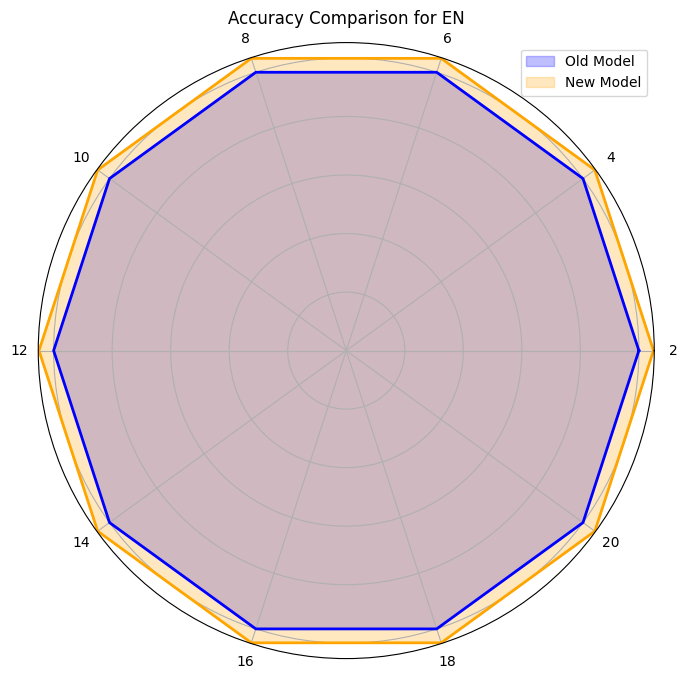

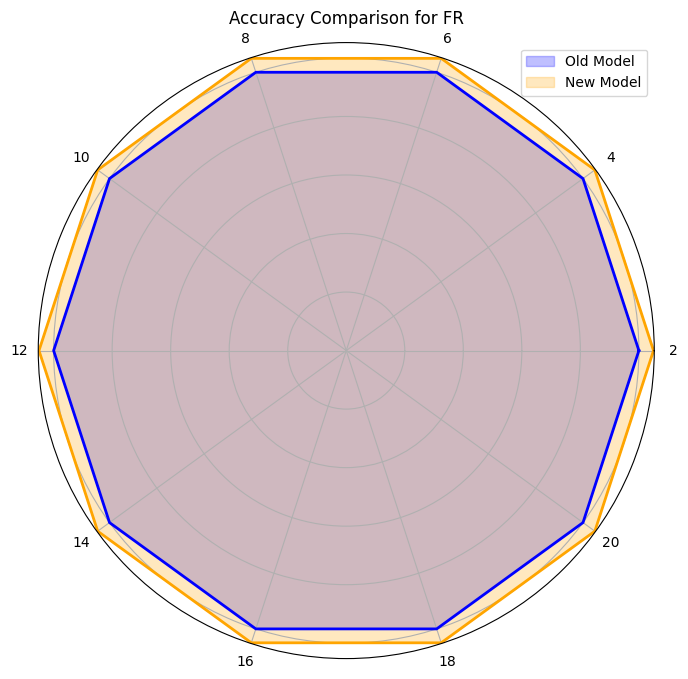

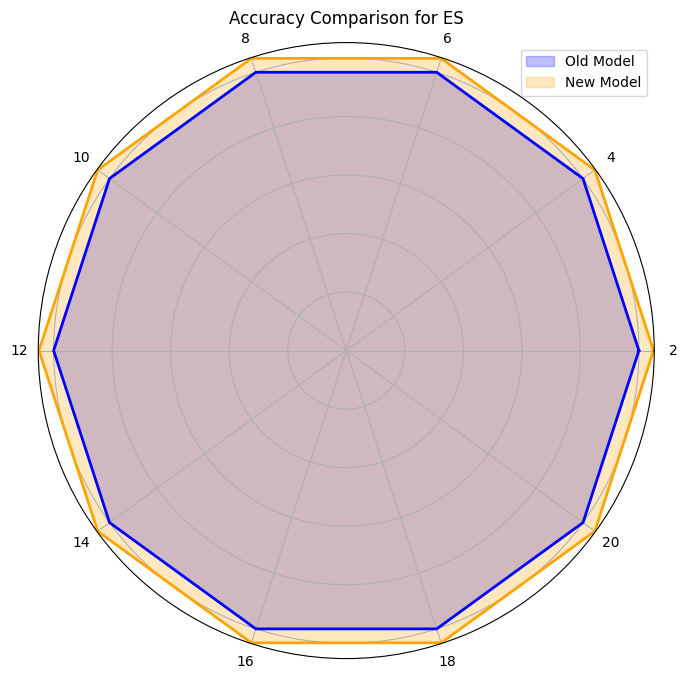

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import string

def generate_hypothetical_data(num_samples):
    languages = ['en', 'fr', 'es']
    texts = {}
    sample_words = {
        'en': ['the', 'is', 'in', 'on', 'and', 'to', 'of', 'a', 'that', 'it'],
        'fr': ['le', 'est', 'dans', 'sur', 'et', 'à', 'de', 'un', 'que', 'il'],
        'es': ['el', 'es', 'en', 'sobre', 'y', 'a', 'de', 'un', 'que', 'lo']
    }

    for lang in languages:
        texts[lang] = ' '.join(np.random.choice(sample_words[lang], size=num_samples * 10))

    return texts

def normalize_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", "", text)
    return text.strip()

def extract_bigrams(text):
    text = normalize_text(text)
    return [text[i:i + 2] for i in range(len(text) - 1)]

def build_bigram_frequencies(texts):
    bigram_freqs = {}
    for lang, text in texts.items():
        bigrams = extract_bigrams(text)
        bigram_freqs[lang] = Counter(bigrams)
    return bigram_freqs

def calculate_accuracy(texts, bigram_freqs, length):
    correct = 0
    total = 0
    for lang, text in texts.items():
        truncated_text = text[:length].strip()
        bigrams = extract_bigrams(truncated_text)
        scores = {l: 0 for l in bigram_freqs.keys()}
        for bigram in bigrams:
            for l in scores:
                scores[l] += bigram_freqs[l].get(bigram, 0)
        detected_lang = max(scores, key=scores.get)
        total += 1
        if detected_lang == lang:
            correct += 1
    return correct / total if total > 0 else 0

def plot_radar_chart(accuracy_results_old, accuracy_results_new, language):
    categories = ['2', '4', '6', '8', '10', '12', '14', '16', '18', '20']  # X-axis labels
    N = len(categories)

    # Values for the old and new models
    values_old = accuracy_results_old[:N]  # Ensure we take only the relevant values
    values_new = accuracy_results_new[:N]  # Ensure we take only the relevant values

    # Make the plot circular
    values_old = np.concatenate((values_old, [values_old[0]]))
    values_new = np.concatenate((values_new, [values_new[0]]))

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Draw one axe per variable and add labels
    ax.fill(angles, values_old, color='blue', alpha=0.25, label='Old Model')
    ax.fill(angles, values_new, color='orange', alpha=0.25, label='New Model')

    # Draw the outline for the old model
    ax.plot(angles, values_old, color='blue', linewidth=2)
    # Draw the outline for the new model
    ax.plot(angles, values_new, color='orange', linewidth=2)

    # Labels for each axis
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(f'Accuracy Comparison for {language.upper()}')
    ax.legend(loc='upper right')

    plt.show()

def main():
    num_samples = 100
    texts = generate_hypothetical_data(num_samples)
    bigram_freqs = build_bigram_frequencies(texts)

    text_lengths = np.arange(2, 101, 2)
    languages = texts.keys()

    accuracy_results_old = {lang: [] for lang in languages}
    accuracy_results_new = {lang: [] for lang in languages}

    for length in text_lengths:
        for lang in languages:
            accuracy = calculate_accuracy({lang: texts[lang]}, bigram_freqs, length)
            accuracy_results_old[lang].append(accuracy)

    for lang in languages:
        accuracy_results_new[lang] = [acc + 0.05 for acc in accuracy_results_old[lang]]  # Simulated new model

    # Plot radar chart for each language separately
    for lang in languages:
        plot_radar_chart(accuracy_results_old[lang], accuracy_results_new[lang], lang)

if __name__ == "__main__":
    main()
